#XGBoost Regressor Model

###Imports and Loading

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shared drives/Project 4 (MATH 3439)/'

Mounted at /content/drive


In [2]:
df = pd.read_csv(drive_dir + 'data/df_model2.csv')

In [3]:
df = df.drop('rounded_price', axis='columns')

In [4]:
df = df.drop('percentile', axis='columns')

In [ ]:
df = df[df['price'] <= 50000]

In [5]:
df = df[df['owner_count'] > 0]

In [6]:
df = df[df['year'] >= 2000]

In [ ]:
df.shape

(448048, 51)

In [ ]:
df.head()

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,savings_amount,seller_rating,sp_name,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,null_per_row,options_count,color_not_bw,interior_simple_color,years_since_make,damage_accidents_theft,4WD
2,35.4,Sedan,Guaynabo,17.0,1233,2500,H4,0,0,1,43.3,15.9,Gasoline,0,58.1,23,305,None,0,0,18.3467,180.9,2017-04-25,UNKNOWN,-66.1098,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5,10965.0,WRX STI,3,46995.0,0,0.0,4.333333,FIAT de San Juan,0,M,6-Speed Manual,Base,AWD,104.3,78.9,2016,3,4.0,0,None,4,0,0
35,35.7,Sedan,Bay Shore,21.0,33,1600,I4,0,0,1,42.2,14.0,Gasoline,0,56.5,28,201,Black,0,0,40.7333,179.9,2020-08-07,BLACK,-73.2587,"['Sport Package', 'Sunroof/Moonroof', 'Adaptiv...",Hyundai,5,30707.0,Elantra,1,13324.0,0,2709.0,3.447761,Atlantic Chevrolet Cadillac,0,A,6-Speed Automatic,Sport Sedan FWD,FWD,106.3,70.9,2017,2,12.0,1,Black,3,0,0
37,38.1,Sedan,Bay Shore,27.0,55,1500,I4,1,0,1,42.0,15.8,Gasoline,0,57.6,36,160,Jet Black,1,0,40.7333,193.8,2020-07-16,SILVER,-73.2587,"['Driver Confidence Package', 'Power Package',...",Chevrolet,5,42394.0,Malibu,1,14639.0,0,1749.0,3.447761,Atlantic Chevrolet Cadillac,0,A,6-Speed Automatic,LT FWD,FWD,111.4,73.0,2018,0,14.0,0,Jet,2,0,0
39,27.3,Coupe,Bronx,18.0,36,3500,V6,0,0,1,45.4,17.4,Gasoline,0,55.1,24,311,Black,0,0,40.8847,184.8,2020-08-04,BLACK,-73.8317,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Lexus,4,62251.0,RC 350,1,32000.0,0,1861.0,2.800000,Eastchester Chrysler Jeep Dodge Ram,0,A,6-Speed Automatic,AWD,AWD,107.5,81.5,2018,0,7.0,1,Black,2,0,0
40,38.4,SUV / Crossover,Bay Shore,18.0,27,3600,V6,0,0,1,41.0,19.4,Gasoline,0,70.7,27,310,Dark Atmosphere/Medium Ash Gray,0,0,40.7333,204.3,2020-08-13,SILVER,-73.2587,"['Power Package', 'Preferred Package', 'Third ...",Chevrolet,8,36410.0,Traverse,1,23723.0,0,3500.0,3.447761,Atlantic Chevrolet Cadillac,0,A,9-Speed Automatic,LT Cloth FWD,FWD,120.9,78.6,2018,0,15.0,0,Dark,2,0,0


In [ ]:
len(df.columns)

51

###Encoding

In [ ]:
df_encoded = df

In [ ]:
for c in df_encoded.columns:
  if c != 'price':  #default is fine; not sure if this line is necessary
    if df_encoded[c].dtype == object:  
        try:  
            le = LabelEncoder()           
            le.fit(df_encoded[c].unique())    
            df_encoded[c] = le.transform(df_encoded[c])  
        except Exception as e:         
            print(c)         
            print(e)

In [ ]:
df_encoded = df_encoded[:-10]

###Split the data into training and testing sets

In [ ]:
y = df_encoded.price
X = df_encoded.drop(['price'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
# train_X.to_csv(drive_dir + 'data/train_X.csv', index=False)
# train_y.to_csv(drive_dir + 'data/train_y.csv', index=False)
# test_X.to_csv(drive_dir + 'data/test_X.csv', index=False)
# test_y.to_csv(drive_dir + 'data/test_y.csv', index=False)

###Training the Model

In [ ]:
model = xgb.XGBRegressor()
train_model = model.fit(train_X, train_y)

[20:52:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


###Feature Importances

In [ ]:
featuredf = pd.DataFrame(train_model.feature_importances_, train_X.columns)   #This makes it in order
featuredf = featuredf.sort_values(by=0, ascending=False)

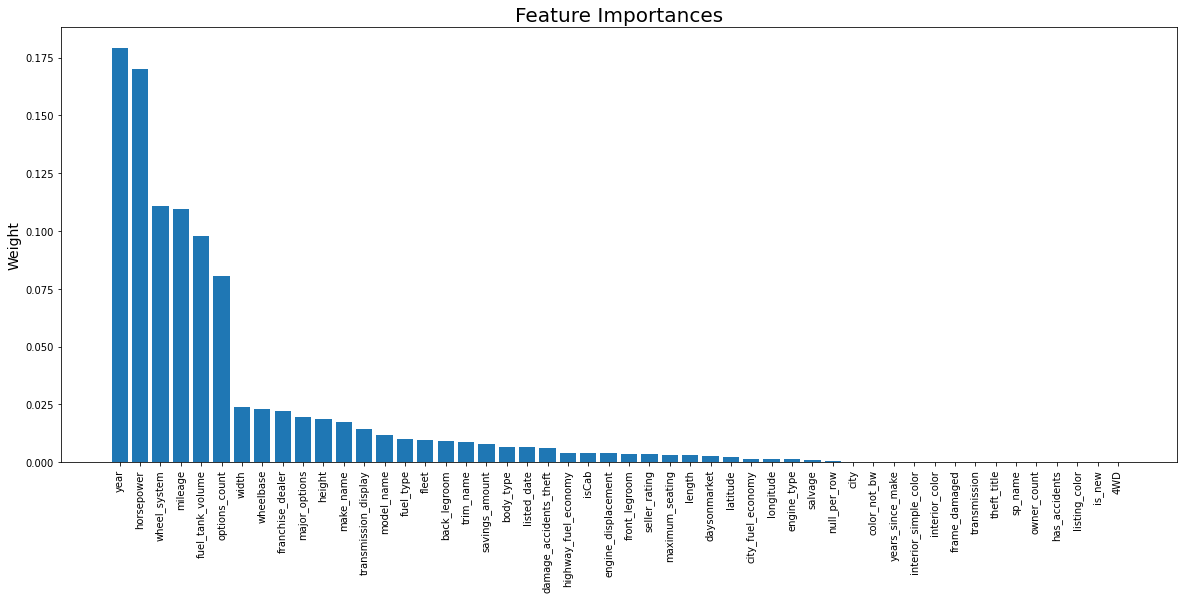

In [ ]:
plt.figure(figsize=(20, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Feature Importances', fontsize=20)
plt.ylabel('Weight', fontsize=14)
plt.savefig(drive_dir + 'feature_importance.png');

In [ ]:
y_preds = train_model.predict(test_X)
((test_y-y_preds)).mean()

4.378506039020302

In [ ]:
#np.save(drive_dir + 'xg_preds.npy', y_preds)

In [ ]:
def mean_abs_pct_error(test_y, y_pred):
  #y_pred = train_model.predict(test_X) 
  return np.mean(np.abs((test_y - y_pred) / test_y)) * 100

In [ ]:
mean_abs_pct_error(test_y, y_preds)

12.547548225280755

In [ ]:
mean_absolute_error(test_y, y_preds)

2190.447126224474

In [ ]:
y_preds

array([17777.62 , 11997.592, 23428.605, ..., 22430.445, 14825.343,
       19148.031], dtype=float32)

## Graphs

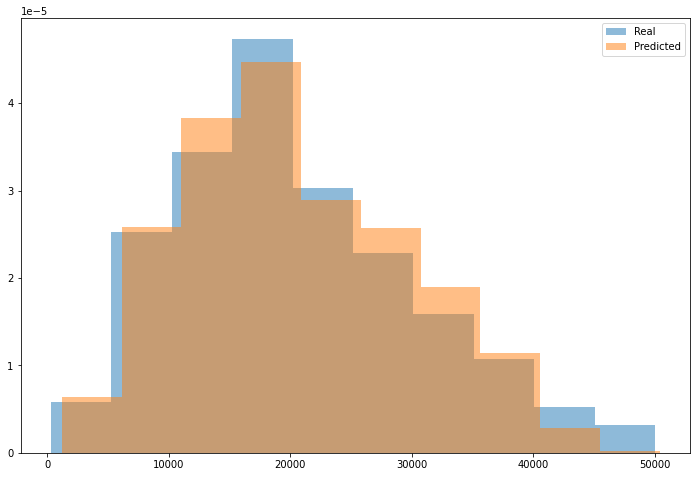

In [ ]:
plt.figure(figsize=(12,8))
plot1 = plt.hist(test_y, alpha = 0.5, density=True, label='Real')#, bins=25)
plot2 = plt.hist(y_preds, alpha = 0.5, density=True, label='Predicted')#, bins=25)
plt.legend()
plt.show();

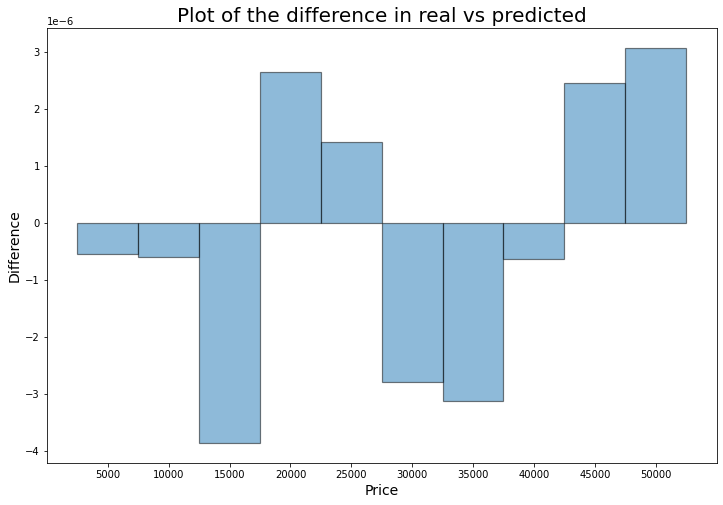

In [ ]:
plt.figure(figsize=(12,8))
diff=plt.bar([1,2,3,4,5,6,7,8,9,10], 
             height=(plot1[0]-plot2[0]), edgecolor='black', 
             linewidth=1.2,width = 1, alpha=0.5) 
plt.xticks([1,2,3,4,5,6,7,8,9,10], [5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])
plt.xlabel('Price', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.title('Plot of the difference in real vs predicted', fontsize=20);

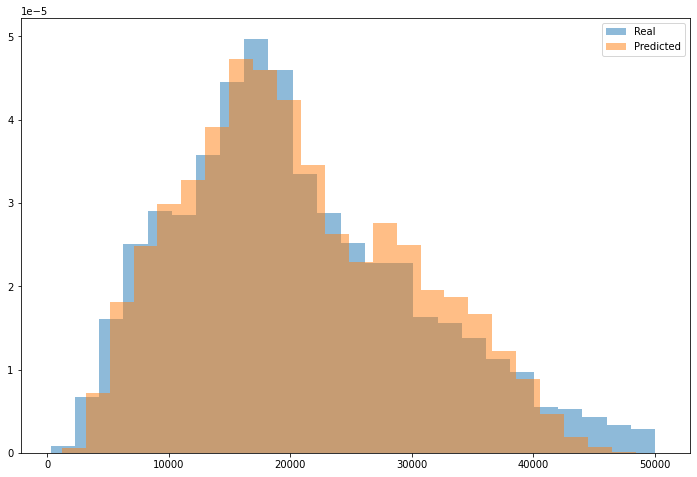

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(test_y, alpha = 0.5, density=True, label='Real', bins=25)
plt.hist(y_preds, alpha = 0.5, density=True, label='Predicted', bins=25)
plt.legend()
plt.show();

### Validation

In [ ]:
val_df = df[-20:]

In [ ]:
val_df.head()

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,savings_amount,seller_rating,sp_name,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,null_per_row,options_count,color_not_bw,interior_simple_color,years_since_make,damage_accidents_theft,4WD
876368,39.7,5,1045,24.0,19,2000,5,0,0,0,40.9,15.6,4,0,65.4,28,252,627,0,0,43.0656,182.3,1202,1,-86.2208,2282,15,5,15971.0,767,1,23995.0,0,1112.0,5.000000,1785,0,0,35,4228,0,107.3,72.4,2018,1,6.0,0,347,2,0,1
876369,35.7,5,3047,26.0,30,1400,5,0,0,1,40.8,14.0,4,0,65.2,34,138,5135,0,0,39.4508,167.2,1191,10,-83.7957,43395,8,5,39626.0,788,2,14030.0,0,113.0,4.588235,1976,0,0,18,3156,3,100.6,69.9,2016,0,8.0,0,1135,4,0,0
876370,39.9,5,1045,20.0,5,2400,5,0,0,0,41.2,18.8,4,0,66.3,28,182,4426,0,0,43.0656,185.5,1216,13,-86.2208,4934,15,5,23868.0,767,1,21995.0,0,1063.0,5.000000,1785,0,0,18,4306,2,112.5,72.8,2017,1,4.0,1,1038,3,0,0
876374,37.8,8,1216,22.0,15,2500,0,0,0,0,43.0,18.5,4,1,66.1,29,170,7445,0,0,42.8046,188.2,1206,13,-86.0599,27943,45,5,109008.0,536,2,13995.0,0,2127.0,4.545455,11552,0,1,38,659,2,107.9,81.0,2012,1,7.0,1,1758,8,1,0
876376,36.5,3,2923,17.0,54,3600,23,1,0,1,40.7,20.0,3,0,69.0,25,283,627,1,0,42.6823,203.7,1167,4,-85.6435,16548,11,7,29393.0,380,1,20400.0,0,21.0,4.666667,5977,0,0,18,2784,3,121.2,88.5,2019,0,9.0,0,347,1,0,0


In [ ]:
for c in val_df.columns:
  if c != 'price':  #default is fine; not sure if this line is necessary
    if val_df[c].dtype == object:  
        try:  
            le = LabelEncoder()           
            le.fit(val_df[c].unique())    
            val_df[c] = le.transform(val_df[c])  
        except Exception as e:         
            print(c)         
            print(e)

In [ ]:
val_price = val_df.price
val_df = val_df.drop('price', axis='columns')

In [ ]:
preds = train_model.predict(val_df)
preds

array([26372.227 , 13858.4795, 19192.43  , 11113.401 , 22838.283 ,
       15013.663 , 18252.236 , 10719.973 , 14723.11  , 42795.973 ,
       15586.808 , 14845.988 , 13719.445 , 22631.928 , 32635.434 ,
       20176.443 , 12069.304 , 13070.349 , 15665.104 , 16273.289 ],
      dtype=float32)

In [ ]:
abs((val_price - preds).mean())

277.556689453125

In [ ]:
val_price = val_price.reset_index()
val_price = val_price.drop('index', axis='columns')
val_price = val_price.reset_index()

In [ ]:
preds = pd.DataFrame(preds)
preds.columns = ['predicted_price']

In [ ]:
val_price = val_price.join(preds)

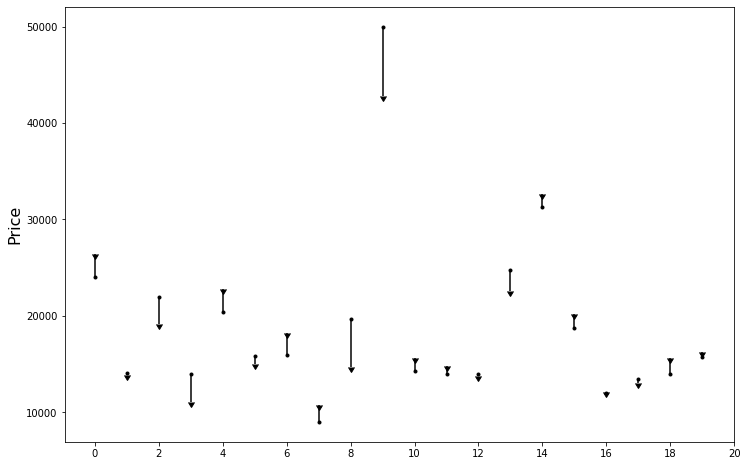

In [ ]:
plt.figure(figsize=(12,8))
plt.errorbar(val_price.index, val_price['price'], yerr=(val_price['price']-val_price['predicted_price']),fmt='.k', uplims=True)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20], [0,2,4,6,8,10,12,14,16,18,20])
plt.ylabel('Price', fontsize=16);

In [ ]:
val_price

,index,price,predicted_price
0,0,23995.0,26372.226562
1,1,14030.0,13858.479492
2,2,21995.0,19192.429688
3,3,13995.0,11113.401367
4,4,20400.0,22838.283203
5,5,15881.0,15013.663086
6,6,15990.0,18252.236328
7,7,8990.0,10719.972656
8,8,19649.0,14723.110352
9,9,49995.0,42795.972656


# Linear Regression

In [ ]:
def predict_price(columns):
  lr = LinearRegression(normalize=True)
  X = df[columns]
  y = df['price']

  lr.fit(X,y)

  y_pred = lr.predict(X)

  fig = plt.figure(figsize=(12, 10))
  plt.scatter(y, y_pred)
  plt.xlabel('Actual prices')
  plt.ylabel('Predicted prices')
  plt.title('Actual vs predicted using linear regression')

  #print(f'The R^2 for {[x for x in columns]} is {[np.corrcoef(df[x],y)[0,1]**2 for x in columns]} respectively.')

  return y_pred, y

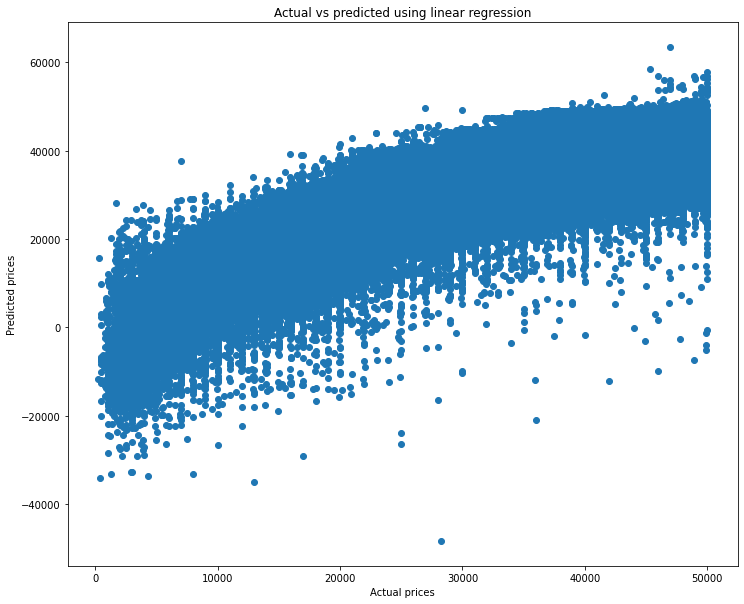

In [ ]:
pred, y = predict_price(['year', 'horsepower', 'mileage', 'owner_count', 'wheel_system', 'options_count'])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, pred)

27732064.249544892

In [ ]:
df.shape

(801577, 51)

# Testing with Input

#Saving the Model

In [ ]:
columns = ['horsepower', 'mileage', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name', 'price']

In [ ]:
df1 = df[columns]

In [ ]:
df1.head()

,horsepower,mileage,wheel_system,year,owner_count,height,engine_type,city_fuel_economy,width,make_name,price
2,305,10965.0,AWD,2016,3,58.1,H4,17.0,78.9,Subaru,46995.0
35,201,30707.0,FWD,2017,1,56.5,I4,21.0,70.9,Hyundai,13324.0
37,160,42394.0,FWD,2018,1,57.6,I4,27.0,73.0,Chevrolet,14639.0
39,311,62251.0,AWD,2018,1,55.1,V6,18.0,81.5,Lexus,32000.0
40,310,36410.0,FWD,2018,1,70.7,V6,18.0,78.6,Chevrolet,23723.0


###Encoding

In [ ]:
df_encoded1 = df1

In [ ]:
for c in df_encoded1.columns:
  if c != 'price':  #default is fine; not sure if this line is necessary
    if df_encoded1[c].dtype == object:  
        try:  
            le = LabelEncoder()           
            le.fit(df_encoded1[c].unique())    
            print(le.classes_)
            df_encoded1[c] = le.transform(df_encoded1[c])  
        except Exception as e:         
            print(c)         
            print(e)

###Split the data into training and testing sets

In [ ]:
y = df_encoded1.price
X = df_encoded1.drop(['price'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
train_X.to_csv(drive_dir + 'data/train_X.csv', index=False)
train_y.to_csv(drive_dir + 'data/train_y.csv', index=False)
test_X.to_csv(drive_dir + 'data/test_X.csv', index=False)
test_y.to_csv(drive_dir + 'data/test_y.csv', index=False)

###Training the Model

In [ ]:
model = xgb.XGBRegressor()
train_model1 = model.fit(train_X, train_y)

[20:57:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
import joblib 
joblib.dump(train_model1, drive_dir + 'XGB_model.joblib')

['/content/drive/Shared drives/Project 4 (MATH 3439)/XGB_model.joblib']

In [ ]:
preds_y = train_model1.predict(test_X)
mean_absolute_error(test_y, preds_y)

2407.3186368851575

In [ ]:
mean_abs_pct_error(test_y, preds_y)

13.577546846737928

In [ ]:
#np.save(drive_dir + 'xg_preds.npy', preds_y)

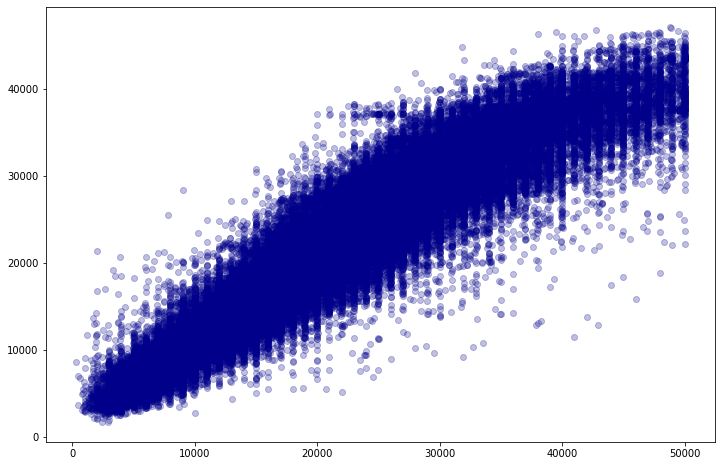

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y,y=preds_y, c='DarkBlue', alpha = .25);

#Getting Inputs

In [ ]:
df['engine_type'].unique()

array(['I4', 'H4', 'I6', 'V6', 'V6 Diesel', 'V8', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Diesel', 'I4 Flex Fuel Vehicle',
       'I6 Diesel', 'V8 Diesel', 'R2', 'W12', 'V10', 'V12',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas', 'I6 Hybrid',
       'I4 Compressed Natural Gas', 'I5 Diesel', 'V10 Diesel', 'W8'],
      dtype=object)

In [ ]:
def test(model, df):
  columns = ['horsepower', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name']

  while True:
    year = int(input('What year is the car? '))
    if year not in range(1950,2021):
      print(f'Not a valid year. Try Again!')
    else:
      break
  horsepower = input('How much horsepower does your car have? ')
  owner_count = input('How many people have owned the car? ')
  height = input('What is the height of the car? ')
  width = input('What is the width of the car? ')
  city_fuel = input('What is the city fuel economy? ')
  while True:
    wheel_system = input('What is the wheel system? (FWD, AWD, 4WD, RWD, 4X2) ')
    if wheel_system not in ['FWD', 'AWD', '4WD', 'RWD', '4X2']:
      print(f'Not a valid wheel system. Check capitilization and spelling. Try Again!')
    else:
      break
  make = input('What is the make of the car? ')
  engine_type = input('What is the engine type? ')

  df_encoded2 = df1
  df_encoded2 = df_encoded2.drop('price', axis='columns')

  my_dict = {'year': [int(year)], 
             'horsepower': [int(horsepower)],
             'height': [int(height)], 
             'owner_count': [int(owner_count)], 
             'wheel_system': [str(wheel_system)],
             'engine_type': [str(engine_type)], 
             'city_fuel_economy': [int(city_fuel)],
             'width': [int(width)],
             'make_name': [str(make)]}

  car = pd.DataFrame.from_dict(my_dict, orient='columns')

  df_encoded2 = pd.concat([df_encoded2, car])

  df_encoded.dtypes

  for c in df_encoded2.columns:
    if c != 'price':  #default is fine; not sure if this line is necessary
      if df_encoded2[c].dtype == object:  
          try:  
              le = LabelEncoder()           
              le.fit(df_encoded2[c].unique())    
              df_encoded2[c] = le.transform(df_encoded2[c])  
          except Exception as e:         
              print(c)         
              print(e)

  car = df_encoded2[-1:]

  price_prediction = model.predict(car)

  print(f'Your car is worth ${price_prediction[0]}.')

  return price_prediction[0]

In [ ]:
price = test(train_model1, df1)

What year is the car? 2020
How much horsepower does your car have? 158
How many people have owned the car? 1
What is the height of the car? 57
What is the width of the car? 71
What is the city fuel economy? 30
What is the wheel system? (FWD, AWD, 4WD, RWD, 4X2) FWD
What is the make of the car? Honda
What is the engine type? I4
Your car is worth $19473.044921875.


In [ ]:
print(f'Your car is worth ${price}.')

Your car is worth $19473.044921875.
